# A/B test analysis

### Project background
An app, **KITTENGRAM** allows users to post pictures of their cats and the other users can like or comments the pictures. Only cats are allowed in the app.

We decide to use 2 KPIs to study if the new Ads structure does give an improvment in revenue:
- **Daily active users** (DAU): to make sure the users come back
- **Clight-through rate** (CTR): New type of sponsored posts vs. old type of sponsorded posts.

#### Define the Hypothesis
* **H0**: tailered ads have no effect on the user engagement - will not affect selected KPIs
* **H1**: tailered ads increase selected KPIs


#### Import required libraries

In [107]:
import pandas as pd
import numpy as np
import altair as alt
from datetime import datetime
from scipy.stats import ttest_ind

## 1. Assignments

#### (1) Load the data 

In [6]:
data = pd.read_csv("assignments.csv")

In [7]:
data.head()

,userid,ts,groupid
0,c5d77c89-33a3-4fe3-9e31-179dec09d49c,2021-11-02T07:31:42Z,0
1,9061d751-7a94-44d3-8792-5ca5ec59aa89,2021-11-13T07:43:51Z,0
2,a5b70ae7-f07c-4773-9df4-ce112bc9dc48,2021-11-20T19:26:07Z,0
3,d2646662-269f-49de-aab1-8776afced9a3,2021-11-20T11:09:02Z,0
4,2d9b23b7-4e5e-4162-9f0f-49e593fdd2b5,2021-11-04T07:42:07Z,0


#### (2) Convert timestamp to a date

In [8]:
data.head(1)['ts'][0]

'2021-11-02T07:31:42Z'

In [9]:
print(datetime.strptime(data.head(1)['ts'][0], '%Y-%m-%dT%H:%M:%SZ').strftime("%Y-%m-%d"))

2021-11-02


In [5]:
data['dt'] = data['ts'].map(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ').strftime("%Y-%m-%d"))

In [14]:
data.head()

,userid,ts,groupid,dt
0,c5d77c89-33a3-4fe3-9e31-179dec09d49c,2021-11-02T07:31:42Z,0,2021-11-02
1,9061d751-7a94-44d3-8792-5ca5ec59aa89,2021-11-13T07:43:51Z,0,2021-11-13
2,a5b70ae7-f07c-4773-9df4-ce112bc9dc48,2021-11-20T19:26:07Z,0,2021-11-20
3,d2646662-269f-49de-aab1-8776afced9a3,2021-11-20T11:09:02Z,0,2021-11-20
4,2d9b23b7-4e5e-4162-9f0f-49e593fdd2b5,2021-11-04T07:42:07Z,0,2021-11-04


#### (3) Describe assignment data

We first look at **active users** and plot user activities over time

In [15]:
data.describe()

,groupid
count,60000.000000
mean,0.500817
std,0.500003
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [16]:
data.groupby(['groupid']).count().drop(['ts','dt'],axis = 1)

,userid
groupid,
0,29951
1,30049


#### (4) Daily active user
On each day we have approximately the same number of users assigned to test (1) or control (0) group

In [19]:
data_count = data.groupby(['groupid','dt']).count().reset_index()

In [20]:
data_count.head()

,groupid,dt,userid,ts
0,0,2021-11-01,1497,1497
1,0,2021-11-02,1467,1467
2,0,2021-11-03,1532,1532
3,0,2021-11-04,1509,1509
4,0,2021-11-05,1503,1503


[Text(0.5, 0, 'Date YYYY-MM-DD'),
 Text(0, 0.5, 'No. Users'),
 (1200.0, 1600.0),
 Text(0.5, 1.0, 'Number of Users Assigned to Each Group Over Time')]

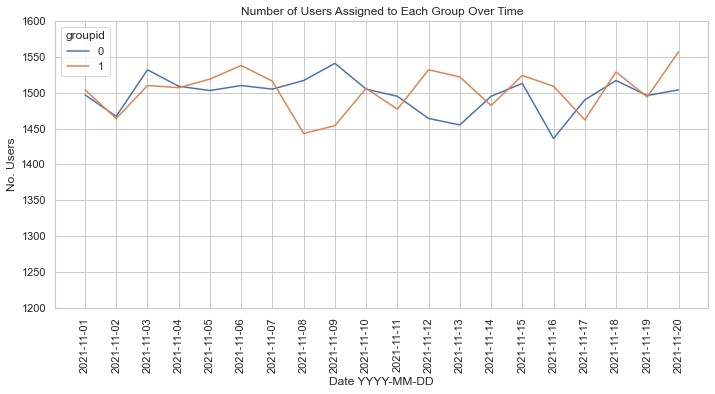

In [35]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.set_style('whitegrid')
g = sns.lineplot(data = data_count, x = 'dt', y = 'userid', hue = 'groupid')
g.tick_params(axis = 'x', labelrotation = 90)
g.set(xlabel = 'Date YYYY-MM-DD', ylabel = 'No. Users',ylim = (1200,1600),title = 'Number of Users Assigned to Each Group Over Time')

## 2. Pre-test metrics on actual data set

### 2.1 Daily Active Users (DAU)

In [36]:
data_act = pd.read_csv("Activity_all.csv")

In [37]:
data_act.head()

,userid,dt,groupid,activity_level
0,a5b70ae7-f07c-4773-9df4-ce112bc9dc48,2021-10-01,0,0
1,d2646662-269f-49de-aab1-8776afced9a3,2021-10-01,0,0
2,c4d1cfa8-283d-49ad-a894-90aedc39c798,2021-10-01,1,0
3,6889f87f-5356-4904-a35a-6ea5020011db,2021-10-01,0,0
4,dbee604c-474a-4c9d-b013-508e5a0e3059,2021-10-01,1,0


In [14]:
data_act.groupby(['groupid','dt']).describe()

activity_level                                             \
                            count       mean       std  min  25%   50%   75%   
groupid dt                                                                     
0       2021-10-01        29951.0   5.241762  6.516640  0.0  0.0   1.0  10.0   
        2021-10-02        29951.0   5.255885  6.509838  0.0  0.0   1.0  10.0   
        2021-10-03        29951.0   5.266068  6.511458  0.0  0.0   1.0  10.0   
        2021-10-04        29951.0   5.212447  6.511711  0.0  0.0   1.0  10.0   
        2021-10-05        29951.0   5.177590  6.512791  0.0  0.0   1.0  10.0   
...                           ...        ...       ...  ...  ...   ...   ...   
1       2021-11-26        30049.0  10.031216  5.770582  0.0  5.0  10.0  15.0   
        2021-11-27        30049.0  10.026024  5.774141  0.0  5.0  10.0  15.0   
        2021-11-28        30049.0   9.975307  5.788257  0.0  5.0  10.0  15.0   
        2021-11-29        30049.0   9.970781  5.799546  0.0  5.0  10.0  15.0   
        2021-11-30        30049.0   9.963926  5.764812  0.0  5.0  10.0  15.0   

                          
                     max  
groupid dt                
0       2021-10-01  20.0  
        2021-10-02  20.0  
        2021-10-03  20.0  
        2021-10-04  20.0  
        2021-10-05  20.0  
...                  ...  
1       2021-11-26  20.0  
        2021-11-27  20.0  
        2021-11-28  20.0  
        2021-11-29  20.0  
        2021-11-30  20.0  

[122 rows x 8 columns]

In [50]:
df_clean = data_act.query('activity_level > 0').groupby(['dt', 'groupid']).count().sort_values(by = ['dt']).reset_index()
df_clean.head()

,dt,groupid,userid,activity_level
0,2021-10-01,0,15337,15337
1,2021-10-01,1,15297,15297
2,2021-10-02,0,15354,15354
3,2021-10-02,1,15421,15421
4,2021-10-03,0,15423,15423


[Text(0.5, 0, 'Date YYYY-MM-DD'),
 Text(0, 0.5, 'No. Users'),
 Text(0.5, 1.0, 'Number of Users Assigned to Each Group Over Time')]

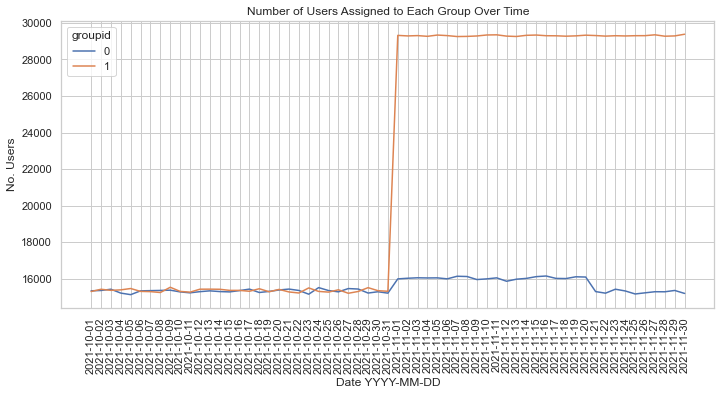

In [51]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.set_style('whitegrid')
g = sns.lineplot(data = df_clean, x = 'dt', y = 'userid', hue = 'groupid')
g.tick_params(axis = 'x', labelrotation = 90)
g.set(xlabel = 'Date YYYY-MM-DD', ylabel = 'No. Users',title = 'Number of Users Assigned to Each Group Over Time')

The above figure shows a significant increase in user activity with good consistency over time since the test started. Also observed is a slight increase (ca.1000) increase in user activity for the conrol group between 2021-11-02 to2021-11-20. This pattern is not observed in the test group. Therefore we would like to analyse this further if data is avaialble. 

The statistics suggest that the test is successful on user activity in terms of **daily active user(DAU)** by a much improved mean (15782 - 29302) and median (15990 - 29300). Nonetheless, we would like to have a look of **user retention** if we have access to this data.

#### (1) Statistics for the control group

In [19]:
(
    data_act.query('activity_level > 0 and groupid == 0 and dt >= "2021-11-01"')
    .groupby(['dt','groupid']).count().reset_index()[['groupid','activity_level']].describe()
)

,groupid,activity_level
count,30.0,30.000000
mean,0.0,15782.000000
std,0.0,371.077276
min,0.0,15163.000000
25%,0.0,15335.000000
50%,0.0,15990.500000
75%,0.0,16045.000000
max,0.0,16147.000000


#### (2) Statistics for the test group

In [20]:
(
    data_act.query('activity_level > 0 and groupid == 1 and dt >= "2021-11-01"')
    .groupby(['dt','groupid']).count().reset_index()[['groupid','activity_level']].describe()
)

,groupid,activity_level
count,30.0,30.000000
mean,1.0,29302.433333
std,0.0,30.417422
min,1.0,29255.000000
25%,1.0,29280.000000
50%,1.0,29300.000000
75%,1.0,29321.000000
max,1.0,29382.000000


#### (3) DAU before and after test start

We see a similar level of activity (mean, std) for the test and control group before the test. Hence we are reassured that there is no or negligible pre-test bias. 

In [22]:
data_act.query('dt < "2021-11-01"').groupby(['groupid']).describe()

activity_level                                               
                 count      mean       std  min  25%  50%   75%   max
groupid                                                              
0             928481.0  5.245635  6.521184  0.0  0.0  1.0  10.0  20.0
1             931519.0  5.240952  6.520811  0.0  0.0  1.0  10.0  20.0

We see a significant increase (5.4 -> 10.0) in mean activity level in the test group after test started. 

The difference is caused by the AB test.

In [52]:
data_act.query('dt >= "2021-11-01"').groupby(['groupid']).describe()

activity_level                                               
                 count      mean      std  min  25%   50%   75%   max
groupid                                                              
0             898530.0  5.402211  6.55557  0.0  0.0   1.0  11.0  20.0
1             901470.0  9.996304  5.78868  0.0  5.0  10.0  15.0  20.0

### 2.2 Comparing the activity between the groups

#### (1) By P value

Run a T test to calculate P-value. P-value measures *the probability of obtaining the observed results providing the null hypothesis is true*


A very small P-value indicate a great statistical significance. In other words, it means a very little chance that the results are 'by chance'

In [101]:
#pass the activity level to a numpy array
res = ttest_ind(data_act.query('groupid == 0 and dt >= "2021-11-01"')['activity_level'].to_numpy(),
                data_act.query('groupid == 1 and dt >= "2021-11-01"')['activity_level'].to_numpy()).pvalue

print('The P value is', "{:.10f}".format(res))

The P value is 0.0000000000


#### (2) By daily active user (DAU)

We first devide the groups in to pre-test and post-test:

In [103]:
before = data_act_count.query('dt < "2021-11-01"')
after = data_act_count.query('dt >= "2021-11-01"')

Then we check for the **pre-test bias** on activity level before the test. 
We see a very similar mean value for the two groups and therefore there is likely no pre-test bias

In [104]:
before_0_au =  np.mean(before.query('groupid == 0')['userid'].to_numpy())
before_1_au =  np.mean(before.query('groupid == 1')['userid'].to_numpy())
print('Use actvity before test started:')
print('mean value for group 0: ', before_0_au,';\nmean value for group 1: ', before_1_au)

Use actvity before test started:
mean value for group 0:  15320.870967741936 ;
mean value for group 1:  15352.516129032258


#### (3) Check pre-test bias by P value
A P value at 0.16 suggests insufficient statistical significance.
That is, we expect no difference in user engagement for the two groups before the tests start. In other words, it re-assured us that there is no or negligible pre-test bias.

In [109]:
res = ttest_ind(before.query('groupid == 0')['userid'].to_numpy(), before.query('groupid == 1')['userid']
                .to_numpy()).pvalue

print('The p value before test is', res)

The p value before test is 0.1630842353828083


#### (4) P-value after test
The siginificant difference in sample mean after test started shows an improved user activity. A p-value close to 0 indicates a very hi

We can therefore reject H0 and concludes that tailered ads increases DAU

In [110]:
mean_a0 = np.mean(after.query('groupid == 0')['userid'].to_numpy())
mean_a1 = np.mean(after.query('groupid == 1')['userid'].to_numpy())
print('Sample mean in CONTROL group after the test is', mean_a0)
print('Sample mean in TEST group after the test is', mean_a1)

Sample mean in CONTROL group after the test is 15782.0
Sample mean in TEST group after the test is 29302.433333333334


In [108]:
res = ttest_ind(after.query('groupid == 0')['userid'].to_numpy(), after.query('groupid == 1')['userid']
                .to_numpy()).pvalue

print('P value after test is', res)

P value after test is 6.590603584107244e-84


### 2.3 Click through rate (CTR)

#### (1) Plot the data
A significant increase in CTR since test start (2021-11-01) is observed.

In [99]:
data_ctr = pd.read_csv("ctr_all.csv")
data_ctr.head()

,userid,dt,groupid,ctr
0,60389fa7-2d71-4cdf-831c-c2bb277ffa1e,2021-11-13,0,31.81
1,b59cb225-d160-4851-92d2-7cc8120a2f63,2021-11-13,0,30.46
2,aa336050-934e-453f-a5b0-dd881fcd114e,2021-11-13,0,34.25
3,8df767f4-a10f-4322-a722-676b7e02b372,2021-11-13,0,34.92
4,a74762ed-4da0-42ab-91d2-40d7e808dfe9,2021-11-13,0,34.95


In [74]:
#calculate average ctr according to groupid and dt
data_ctr_avg = data_ctr.groupby(['groupid','dt']).mean().sort_values(['dt']).reset_index()

[Text(0.5, 0, 'Date YYYY-MM-DD'),
 Text(0, 0.5, 'CTR'),
 Text(0.5, 1.0, 'CTR for Each Group Over Time')]

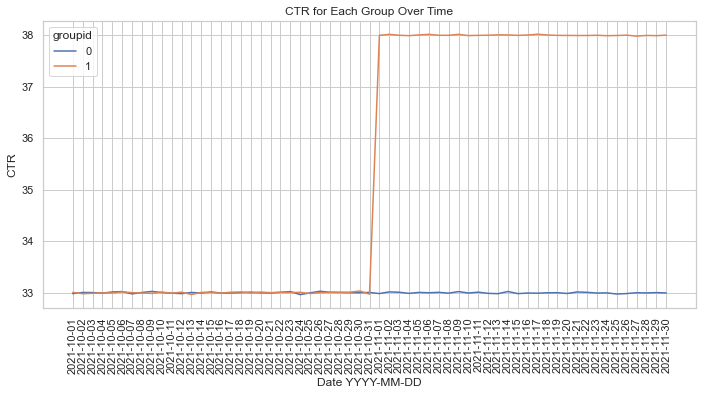

In [100]:
#plot CTR against time
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.set_style('whitegrid')
g = sns.lineplot(data = data_ctr_avg, x = 'dt', y = 'ctr', hue = 'groupid')
g.tick_params(axis = 'x', labelrotation = 90)
g.set(xlabel = 'Date YYYY-MM-DD', ylabel = 'CTR',title = 'CTR for Each Group Over Time')

#### (2) pretest bias check

Apart from a similar sample mean, we also see a similar level of std for the two group.    
Therefore we can conclude there is little or no pre-test bias

In [79]:
before = data_ctr.query('dt < "2021-11-01"')[['groupid', 'ctr']]
after = data_ctr.query('dt >= "2021-11-01"')[['groupid', 'ctr']]

In [91]:
before_0 = before.query('groupid == 0')['ctr'].to_numpy().mean()
before_1 = before.query('groupid == 1')['ctr'].to_numpy().mean()

print('CTR before test started:')
print('mean value for group 0: ', before_0,';\nmean value for group 1: ', before_1)

CTR before test started:
mean value for group 0:  33.00091277553074 ;
mean value for group 1:  32.99957172093258


#### (3) Test performance

* We see an increase of ca. 5% in CTR after test started    

* A similar std after test started suggest a negligible change in sample distribution. It only shifts towards a higher level with the existing shape, which is expected. 

In [92]:
after_0 = after.query('groupid == 0')['ctr'].to_numpy().mean()
after_1 = after.query('groupid == 1')['ctr'].to_numpy().mean()
print('CTR after test started:')
print('mean value for group 0: ', after_0,';\nmean value for group 1: ', after_1)

CTR after test started:
mean value for group 0:  32.996977569382835 ;
mean value for group 1:  37.99695912626142


In [94]:
s_a0 = after.query('groupid == 0')['ctr'].to_numpy().std()
s_a1 = after.query('groupid == 1')['ctr'].to_numpy().std()
print('std for CTR after test started:')
print('std for group 0: ', s_a0,';\nmean value for group 1: ', s_a1)

std for CTR after test started:
std for group 0:  1.7331985918552912 ;
mean value for group 1:  1.7323710606903675


#### (4) P-values

We regard the test as successful because:
* we see a similarity in CTR behaviour (large P-value) before the test started, suggesting little or no pre-test bias

* a very low P-value after the test started suggests a difference in behaviour caused by the test. 

In [95]:
res = ttest_ind(before.query('groupid == 0')['ctr'].to_numpy(), before.query('groupid == 1')['ctr']
                .to_numpy()).pvalue

print('The p value for the two groups before the test' ,res)

The p value for the two groups before the test 0.705741417344299


It suggests a similarity in CTR behaviour for the two groups before the test

In [98]:
res = ttest_ind(after.query('groupid == 0')['ctr'].to_numpy(), after.query('groupid == 1')['ctr']
                .to_numpy()).pvalue
print('The P value after the test is', "{:.10f}".format(res))

The P value after the test is 0.0000000000
